In [1]:
import pretty_midi
import numpy as np
import datapreparation as datp
reload(datp)
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn


In [10]:
"""
classical music dataset (downloaded bach, mozart, brahms and debussy) : http://www.piano-midi.de


lakh piano roll (not used) https://salu133445.github.io/lakh-pianoroll-dataset/dataset.html
"""

"""
helper libraries (via pip install):
pypianoroll for visualization
pretty_midi for data conversion
"""

'\nhelper libraries (via pip install):\npypianoroll for visualization\npretty_midi for data conversion\n'

In [4]:
### convert all mid to piano_roll
#files=!ls datasets/classical/*.mid
#for f in files:
#    datp.midfile_to_piano_roll(f)
    
    
### convert all mid to piano_roll
fs=1
files=!ls datasets/classical/*.mid
for f in files:
    datp.midfile_to_piano_roll(f,fs)

In [3]:
## load dataset of piano roll as csv
dataset = datp.load_all_dataset("datasets/classical/piano_roll_fs5/",binarize=False)

In [23]:
dataset_tags = datp.load_all_dataset_names("datasets/classical/piano_roll_fs5/")

In [120]:
tags_ids=dict(zip(np.unique(dataset_tags),range(np.unique(dataset_tags).size)))

In [7]:
torch.Tensor(dataset[0])

tensor([[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        [  1.,   0.,   0.,  ...,   0.,   0.,   0.],
        [  2.,   0.,   0.,  ...,   0.,   0.,   0.],
        ...,
        [125.,   0.,   0.,  ...,   0.,   0.,   0.],
        [126.,   0.,   0.,  ...,   0.,   0.,   0.],
        [127.,   0.,   0.,  ...,   0.,   0.,   0.]])

In [7]:
print datp.get_max_length(dataset)
print datp.get_numkeys(dataset)

maxlength = datp.get_max_length(dataset)
numkeys = datp.get_numkeys(dataset)[0]

83091
[128]


In [6]:
datp.visualize_piano_roll(dataset[10])


NameError: name 'dataset' is not defined

In [9]:
datp.piano_roll_to_mid_file(dataset[5],"dataset5.mid")

'deeplearningcourse/dataset5.mid'

In [33]:
#datp.embed_play_v1(dataset[0])

In [59]:
import model as mymodel
reload(mymodel)

<module 'model' from 'model.py'>

In [60]:
import dataset as dats
reload(dats)
data = dats.pianoroll_dataset_batch("datasets/classical")

In [51]:
##model = mymodel.Composer(input_size=128, hidden_size=50, num_tags=4, n_layers=4)

model = mymodel.Composer(input_size=data.num_keys(), hidden_size=50, num_tags=data.num_tags(), n_layers=5)


In [55]:
rnn = model
rnn = rnn

criterion = nn.BCELoss()

learning_rate = 0.001
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)



for i in range(100):
    for item in [data[1],data[5],data[7]]:
        optimizer.zero_grad()
        res=model(item[0],item[1])
        loss=criterion(res[0],item[-1])
        loss.backward()
        optimizer.step()
        print loss

tensor(0.6746, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6672, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6588, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6460, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6346, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6204, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6012, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5840, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5582, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5334, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.5139, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.4863, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.4610, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.4462, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.4202, grad_fn=<BinaryCrossEntropyBackward>)


In [34]:
#song=model.generate( torch.LongTensor([item[1]]).unsqueeze(1),10000,1)
#datp.visualize_piano_roll(( song.squeeze(1).detach().numpy()).astype(int).T)
#datp.embed_play_v1(( song.squeeze(1).detach().numpy()).astype(int).T)

In [62]:
#song=model.generate( torch.LongTensor([item[1]]).unsqueeze(1),10000,10)
#datp.visualize_piano_roll(( song.squeeze(1).detach().numpy()).astype(int).T)
#datp.embed_play_v1(( song.squeeze(1).detach().numpy()).astype(int).T)

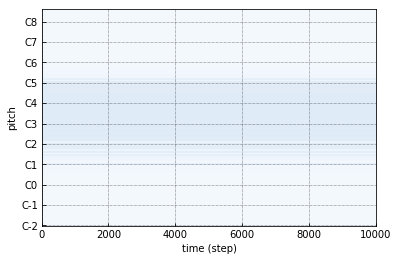

In [20]:


init = torch.randint(0,2,size=(10,1,model.input_size))
res = init
hidden = None
for i in xrange(10000//10):
    init,hidden = model.forward(init,item[1],hidden)
    #init = torch.exp(torch.exp(init))
    #init = torch.round(init)
    res = torch.cat ( ( res, init ) )
song = res
datp.visualize_piano_roll(( song.squeeze(1).detach().numpy()).astype(int).T)


In [64]:
#datp.embed_play_v1(( song.squeeze(1).detach().numpy()).astype(int).T)

In [63]:


#datp.embed_play_v1(( item[0].squeeze(1).detach().numpy()>0).astype(int).T)

composer =  bach


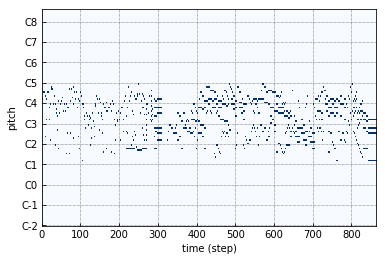

In [26]:
index = 2

print "composer = ",dataset_tags[index]

datp.visualize_piano_roll(dataset[index].T)


composer =  bach


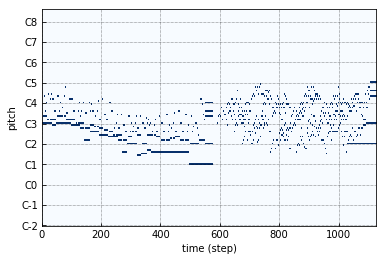

In [27]:
index = 0

print "composer = ",dataset_tags[index]

datp.visualize_piano_roll(dataset[index].T)


composer =  mz


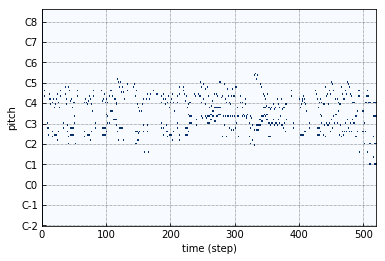

In [32]:
index = -4

print "composer = ",dataset_tags[index]

datp.visualize_piano_roll(dataset[index].T)

In [11]:
dataset[0].view_pianoroll(0)

AttributeError: 'numpy.ndarray' object has no attribute 'view_pianoroll'

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])